In [100]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


#name columns according to the given name 
df= pd.read_csv(r'SFlow_Data_Lab4.csv', index_col=False,names=['type','sflow_agent_addr',
'inputPort','outputPort','src_MAC','dst_MAC','ethernet_type','in_vlan','out_vlan',
'src_IP','dst_IP','IP_Protocol','ip_tos','ip_ttl','udp_src_port','udp_dst_port',
'tcp_flags','packet_size','IP_size','sampling_rate','dummy'])

In [66]:
df.shape

(69370, 21)

# Frequency Analysis

## Top 5 Talkers&Listeners, Top Protocols


In [67]:
top5_talkers_ip = df['src_IP'].value_counts()[:5]
top5_listeners_ip = df['dst_IP'].value_counts()[:5]

tcp_count = df['IP_Protocol'].value_counts().get(6)
udp_count = df['IP_Protocol'].value_counts().get(17)
top3_IP_Protocols = df['IP_Protocol'].value_counts()[:3]

top5_apps_protocol = df['udp_dst_port'].value_counts()[:5]

total_traffic = df['IP_size'].sum()

print('Top 5 Talkers (IP):')
print(top5_talkers_ip)
print('\n')
   
print('Top 5 Listeners (IP):')
print(top5_listeners_ip)
print('\n')

print('Top 3 IP Protocols:')
print(top3_IP_Protocols)
print('\n')

print('Top 5 Application Protocols:')
print(top5_apps_protocol)
print('\n')

print('Total traffic: {} bytes\n'.format(total_traffic))

Top 5 Talkers (IP):
193.62.192.8     3041
155.69.160.32    2975
130.14.250.11    2604
14.139.196.58    2452
140.112.8.139    2056
Name: src_IP, dtype: int64


Top 5 Listeners (IP):
103.37.198.100     3841
137.132.228.15     3715
202.21.159.244     2446
192.101.107.153    2368
103.21.126.2       2056
Name: dst_IP, dtype: int64


Top 3 IP Protocols:
6     56064
17     9462
50     1698
Name: IP_Protocol, dtype: int64


Top 5 Application Protocols:
443      13423
80        2647
52866     2068
45512     1356
56152     1341
Name: udp_dst_port, dtype: int64


Total traffic: 64777822 bytes



## Top 5 communication Pairs

In [68]:
print('Additional stats:\n')

pairs={}
for index, row in df.iterrows():
    word1 = row['src_IP']+'/'+row['dst_IP']
    word2 = row['dst_IP']+'/'+row['src_IP']
    if word1 in pairs.keys():
        pairs[word1]+=1
    elif word2 in pairs.keys():
        pairs[word2]+=1
    else:
        pairs[word1]=1

pairs_sorted = sorted([(k,v) for k,v in pairs.items()], key= lambda x: x[1], reverse=True)

print('Top 5 communication pairs:\n{}\n'.format(pairs_sorted[:5]))

Additional stats:

Top 5 communication pairs:
[('137.132.228.15/193.62.192.8', 4951), ('130.14.250.11/103.37.198.100', 2842), ('14.139.196.58/192.101.107.153', 2368), ('140.112.8.139/103.21.126.2', 2056), ('140.90.101.61/167.205.52.8', 1752)]



## Network Visualization 

Network visualised:



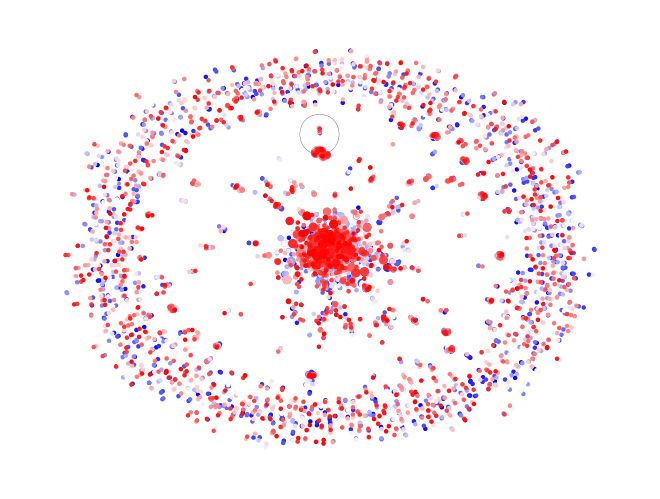

In [69]:
G = nx.Graph()
nodes = list(set(df['src_IP'].tolist()+df['dst_IP'].tolist())) #creating nodes
G.add_nodes_from(nodes)
for (p,n) in pairs_sorted:
    G.add_edge(p.split('/')[0], p.split('/')[1], weight=n)
size = []
for node in nodes:
    if G.degree(node, weight='weight')<25:
        #color.append('g')
        size.append(5)
    elif G.degree(node, weight='weight')<50:
        #color.append('b')
        size.append(10)
    elif G.degree(node, weight='weight')<75:
        #color.append('c')
        size.append(15)
    elif G.degree(node, weight='weight')<100:
        #color.append('y')
        size.append(20)
    elif G.degree(node, weight='weight')<125:
        #color.append('m')
        size.append(25)
    else:
        #color.append('r')
        size.append(30)
edges = G.edges()
weights = [G[u][v]['weight']/500 for u,v in edges]
print('Network visualised:\n')
nx.draw_spring(G, node_size=size, node_color=range(len(nodes)), width=weights, cmap=plt.cm.bwr)

# Geospatial Visualization

In [70]:
df1 = df.loc[:, ('src_IP','dst_IP')]
df1.head()

src_IP          dst_IP
0  130.246.176.22   140.115.32.81
1   155.69.160.32  64.233.188.128
2  130.246.176.53   140.115.32.83
3   155.69.160.32   54.169.174.79
4  137.132.228.15    193.62.192.8

In [71]:
import requests
import ipaddress
ips = list(set(df1['src_IP'].tolist()+df1['dst_IP'].tolist()))
print(len(ips))
valid_ips = []
for ip in ips:
    try:
        ipaddress.ip_address(ip)
        valid_ips.append(ip)
    except:
        pass
print(len(valid_ips))

5929
4777


## Batch Ip geolocation look up via ip-api.com

In [72]:
len(valid_ips) #we have 4777 items to handle 

4777

In [73]:
d = {}
for i in range(0,4601,100): #fetch from 0 to 4700 
    j = i + 100; #fetch 100 per each 
    print("Now we are at index i : ", i)
    res = requests.post("http://ip-api.com/batch",json=valid_ips[i:j]).json()
    res = pd.DataFrame(res)
    for index, row in res.iterrows():
        d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon'],res.at[index,'org'],res.at[index,'countryCode']]
    
    
    
    

Now we are at index i :  0
Now we are at index i :  100
Now we are at index i :  200
Now we are at index i :  300
Now we are at index i :  400
Now we are at index i :  500
Now we are at index i :  600
Now we are at index i :  700
Now we are at index i :  800
Now we are at index i :  900
Now we are at index i :  1000
Now we are at index i :  1100
Now we are at index i :  1200
Now we are at index i :  1300
Now we are at index i :  1400
Now we are at index i :  1500
Now we are at index i :  1600
Now we are at index i :  1700
Now we are at index i :  1800
Now we are at index i :  1900
Now we are at index i :  2000
Now we are at index i :  2100
Now we are at index i :  2200
Now we are at index i :  2300
Now we are at index i :  2400
Now we are at index i :  2500
Now we are at index i :  2600
Now we are at index i :  2700
Now we are at index i :  2800
Now we are at index i :  2900
Now we are at index i :  3000
Now we are at index i :  3100
Now we are at index i :  3200
Now we are at index i 

In [74]:
#do it for last 77 
res = requests.post("http://ip-api.com/batch",json=valid_ips[4700:]).json()
res = pd.DataFrame(res)
for index, row in res.iterrows():
    d[res.at[index,'query']] = [res.at[index,'lat'],res.at[index,'lon'],res.at[index,'org'],res.at[index,'countryCode']]

In [75]:
len(d)

4777

In [76]:
ips = d.keys()

df1['src_lat'] = None
df1['src_lng'] = None
df1['dst_lat'] = None
df1['dst_lng'] = None

for index, row in df1.iterrows():
    
    src_ip = df1.at[index,'src_IP']
    if src_ip in ips:
        df1.at[index,'src_lat'] = d[src_ip][0]
        df1.at[index,'src_lng'] = d[src_ip][1]
    
    dst_ip = df1.at[index,'dst_IP']
    if dst_ip in ips:
        df1.at[index,'dst_lat'] = d[dst_ip][0]
        df1.at[index,'dst_lng'] = d[dst_ip][1]

df1= df1.dropna()

In [77]:
df1

src_IP           dst_IP  src_lat   src_lng  dst_lat   dst_lng
0       130.246.176.22    140.115.32.81   51.567  -1.78472  24.9614  121.2437
1        155.69.160.32   64.233.188.128  1.34712    103.68   37.422  -122.084
2       130.246.176.53    140.115.32.83   51.567  -1.78472  24.9614  121.2437
3        155.69.160.32    54.169.174.79  1.34712    103.68  1.28009   103.851
4       137.132.228.15     193.62.192.8  1.29758   103.773  52.1932    0.1426
...                ...              ...      ...       ...      ...       ...
69365  207.241.228.157     210.48.222.9  35.2003 -106.6417   3.1413   101.685
69366   192.122.131.36   216.58.203.234  1.29961   103.788  1.35208    103.82
69367   137.132.228.15     193.62.192.8  1.29758   103.773  52.1932    0.1426
69368     155.69.196.9      74.125.56.6  1.34712    103.68   37.422  -122.084
69369    14.139.196.58  192.101.107.153  26.1206   91.6523  46.3448  -119.279

[67933 rows x 6 columns]

## World map visualization from opendatasoft


<AxesSubplot:>

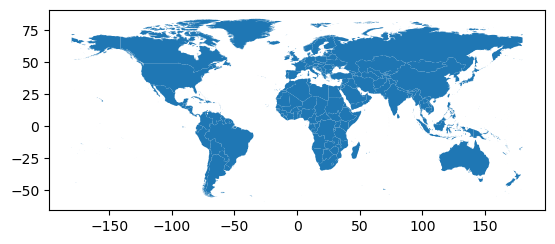

In [78]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

world_map = gpd.read_file(r'world-administrative-boundaries.shp')
world_map.plot()

In [79]:
world_map.crs = "EPSG:4326"

<AxesSubplot:>

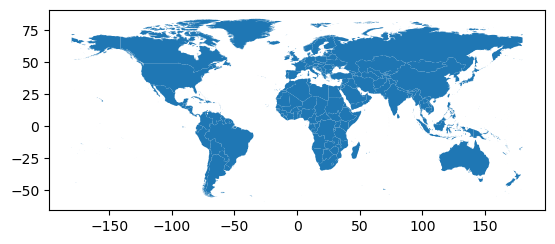

In [80]:
world_map.to_crs(epsg=4326).plot()

## Source IP Destination 

In [81]:
crs = {'init':'EPSG:4326'}
geo_src = [Point(xy) for xy in zip(df1['src_lng'], df1['src_lat'])]
geo_df = gpd.GeoDataFrame(df1, 
                          crs = crs, 
                          geometry = geo_src)


/Users/khantzayar/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, 'Source IP Geolocations')

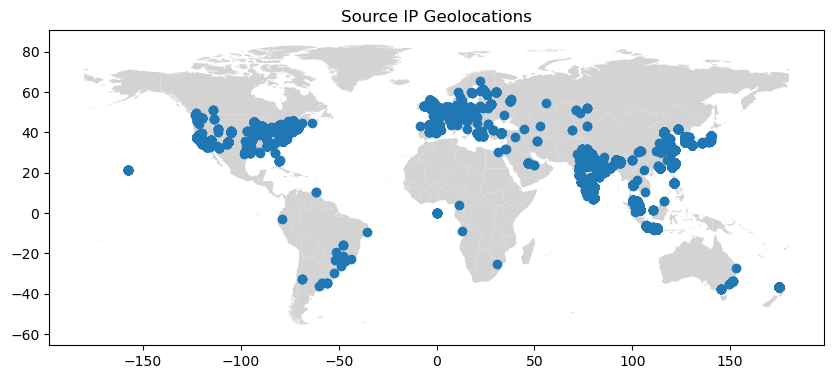

In [82]:
fig, ax = plt.subplots(figsize = (10,10))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax)
ax.set_title('Source IP Geolocations')

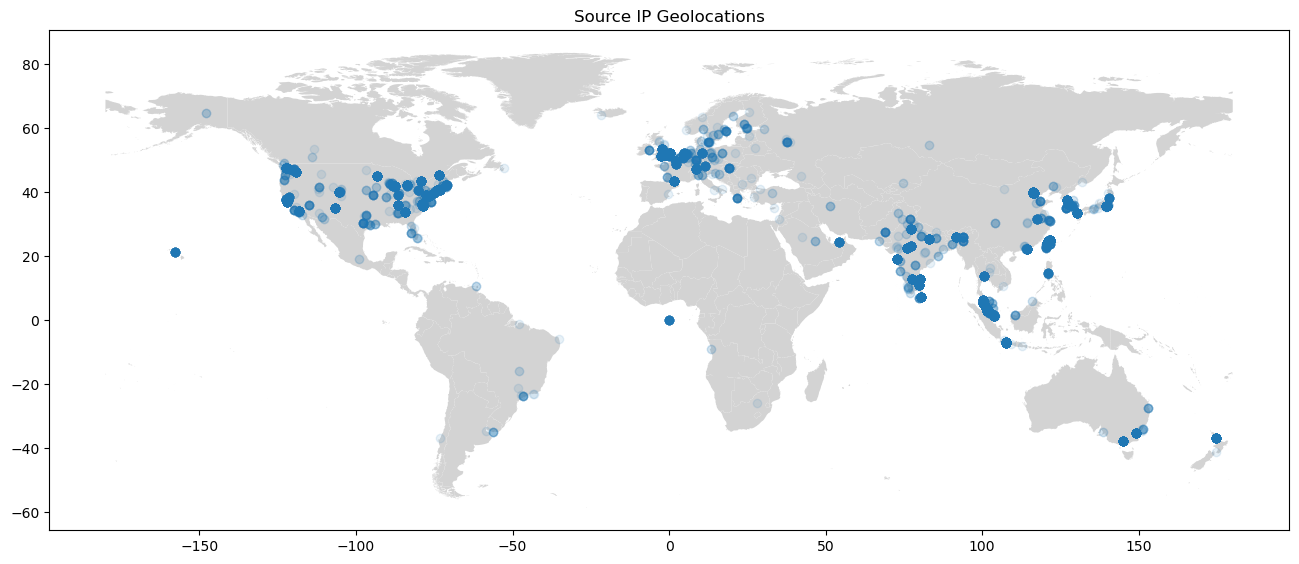

In [89]:
fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, alpha = .1 )
ax.set_title('Source IP Geolocations')
plt.savefig('Source IP Geolocations')

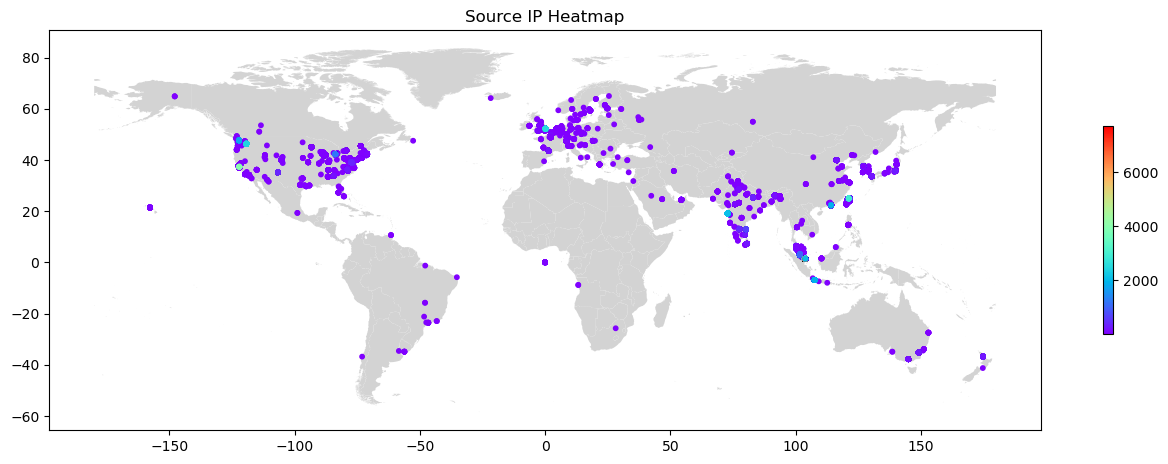

In [90]:
z={}
geo_df['count'] = 0
for index, row in geo_df.iterrows():
    geo = str(geo_df.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df.iterrows():
    geo = str(geo_df.at[index,'geometry'])
    geo_df.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Source IP Heatmap')
plt.savefig('Source IP Heat Map')

## Destination IP Visualization 

In [86]:
crs = {'init':'EPSG:4326'}
geo_dst = [Point(xy) for xy in zip(df1['dst_lng'], df1['dst_lat'])]
geo_df1 = gpd.GeoDataFrame(df1, 
                          crs = crs, 
                          geometry = geo_dst)

/Users/khantzayar/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, 'Destination IP Geolocations')

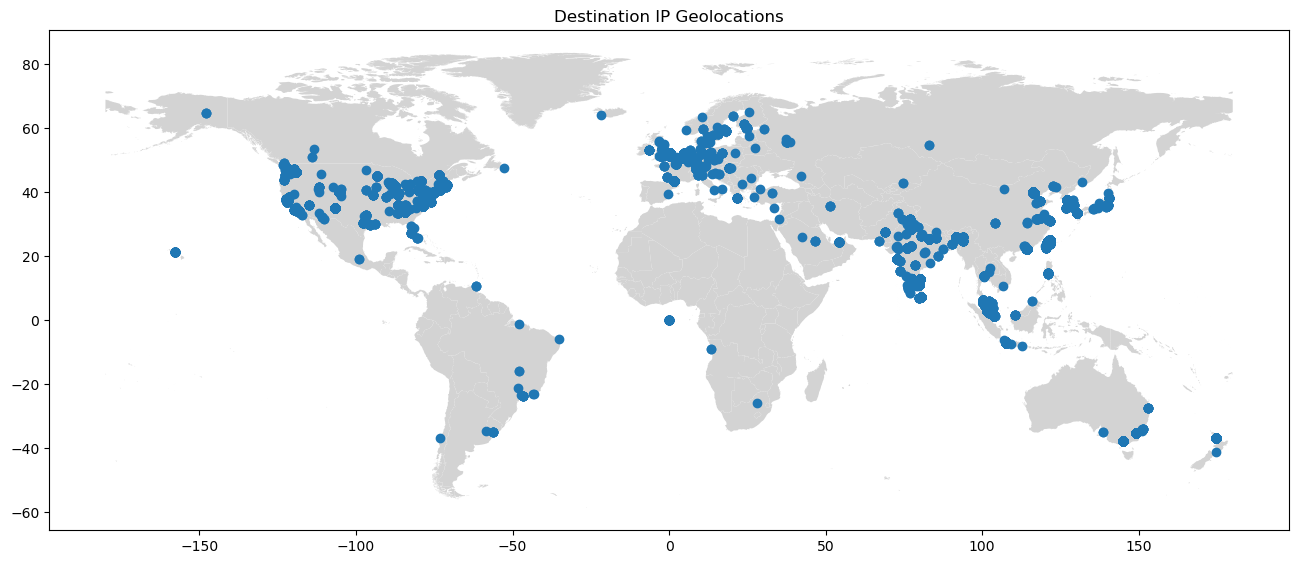

In [91]:
fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(ax=ax)
ax.set_title('Destination IP Geolocations')

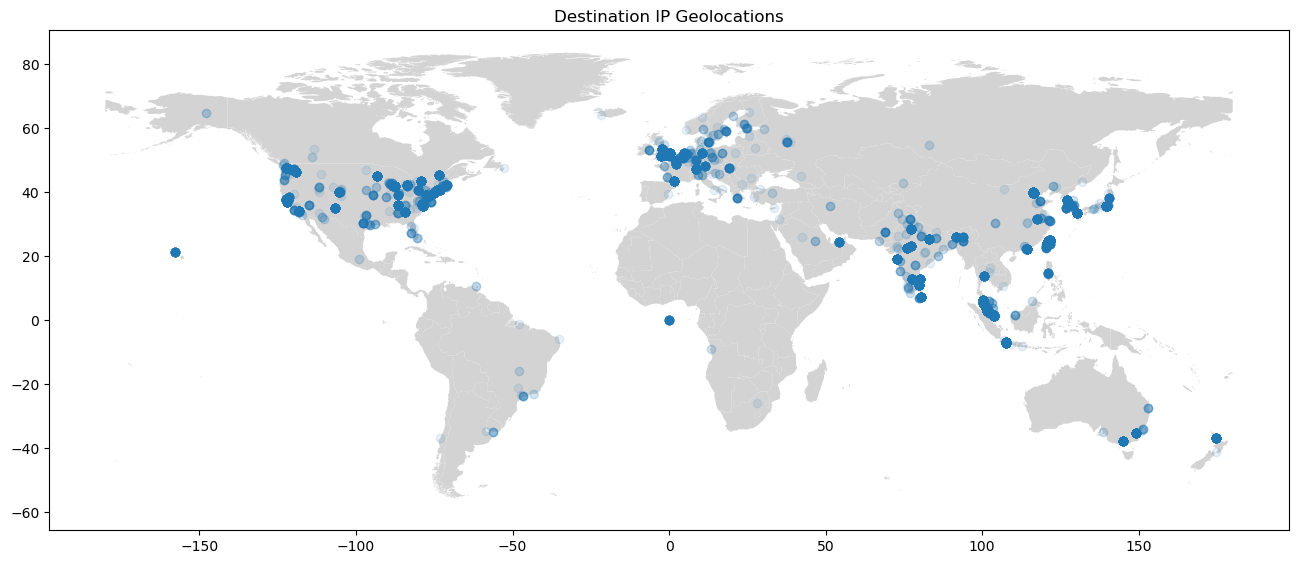

In [92]:
fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(ax=ax, alpha = .1 )
ax.set_title('Destination IP Geolocations')
plt.savefig('Destination IP Geolocations')

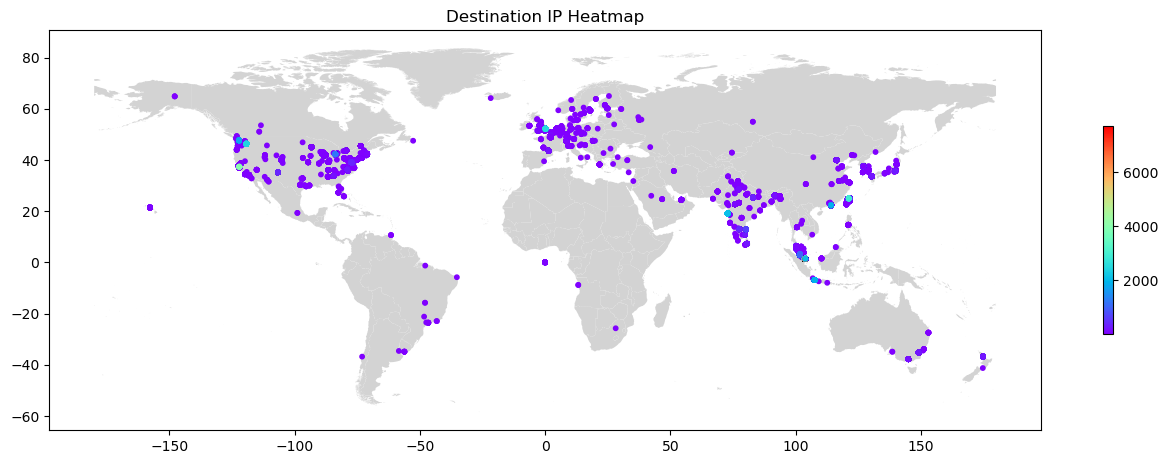

In [94]:
z={}
geo_df1['count'] = 0
for index, row in geo_df1.iterrows():
    geo = str(geo_df1.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df1.iterrows():
    geo = str(geo_df1.at[index,'geometry'])
    geo_df1.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df1.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Destination IP Heatmap')
plt.savefig('Destination IP Heat Map')

Overall Geospatial Visualization 

In [95]:
ips = df1['src_IP'].tolist()+df1['dst_IP'].tolist()
lats = df1['src_lat'].tolist()+df1['dst_lat'].tolist()
lngs = df1['src_lng'].tolist()+df1['dst_lng'].tolist()

df2 = pd.DataFrame(
    {'ip': ips,
     'lat': lats,
     'lng': lngs
    })

In [96]:
crs = {'init':'EPSG:4326'}
geo_dst = [Point(xy) for xy in zip(df2['lng'], df2['lat'])]
geo_df2 = gpd.GeoDataFrame(df2, 
                          crs = crs, 
                          geometry = geo_dst)

/Users/khantzayar/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


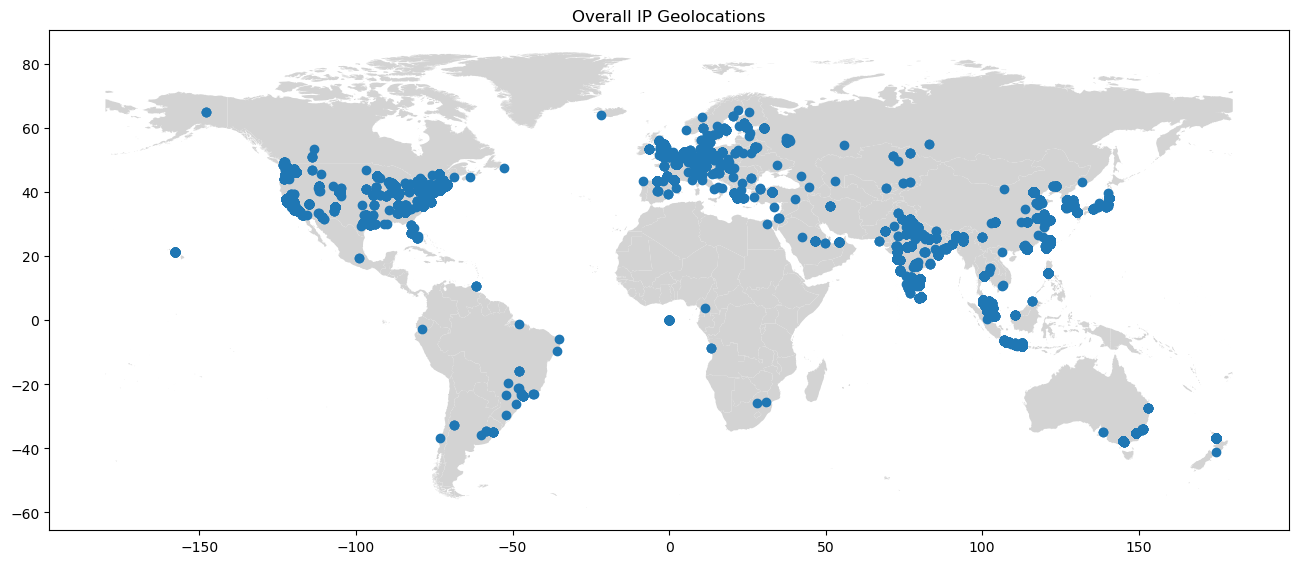

In [97]:
fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(ax=ax)
ax.set_title('Overall IP Geolocations')
plt.savefig('Overall IP Geolocations')

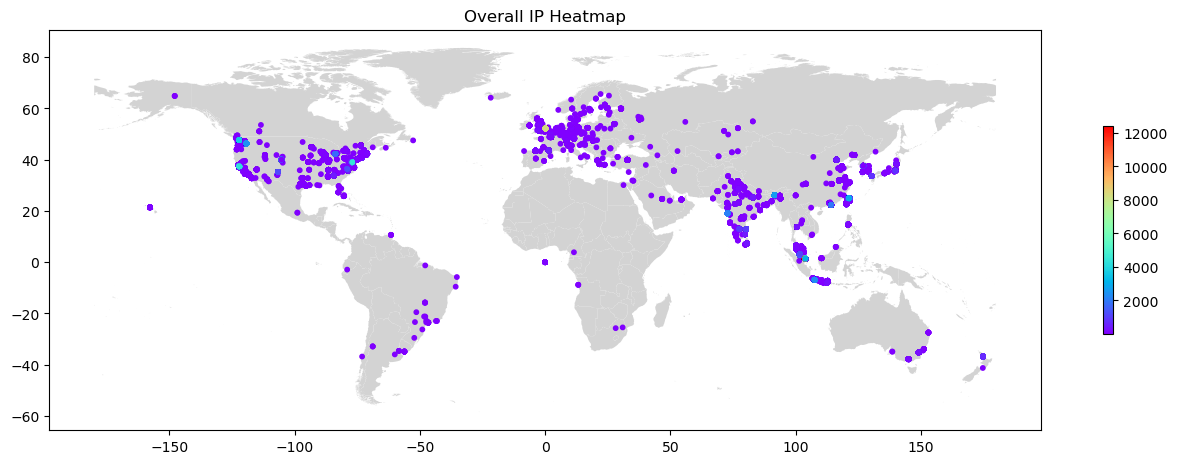

In [98]:
z={}
geo_df2['count'] = 0
for index, row in geo_df2.iterrows():
    geo = str(geo_df2.at[index,'geometry'])
    if geo in z.keys():
        z[geo] = z[geo]+1
    else:
        z[geo] = 1

for index, row in geo_df2.iterrows():
    geo = str(geo_df2.at[index,'geometry'])
    geo_df2.at[index,'count'] = z[geo]

fig, ax = plt.subplots(figsize = (16,9))
world_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df2.plot(column = 'count', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Overall IP Heatmap')
plt.savefig('Overall IP Heat Map')

In [99]:
from pyvis.network import Network
G = nx.Graph()
ips = d.keys()
nodes = list(set(df['src_IP'].tolist()+df['dst_IP'].tolist())) #unique ips
for node in nodes:
    if node in ips:
        G.add_node(node,label=d[node][2],countryCode=d[node][3]) #add node, id=ip, label=org name

for (p,n) in pairs_sorted:
    G.add_edge(p.split('/')[0], p.split('/')[1], weight=n)

nt = Network(height='750px', width='100%', bgcolor='#222222', font_color='white',cdn_resources='remote')
nt.from_nx(G)
nt.show('network.html')

network.html


AttributeError: 'NoneType' object has no attribute 'render'

In [58]:
df3 = pd.DataFrame.from_dict(data=d, orient='index', columns=['lat','lng','org','cc'])
df3.index.name = 'ip'
df3

lat       lng                                   org  cc
ip                                                                           
192.248.9.142     7.25494   80.5974  Lanka Education and Research Network  LK
117.103.109.166  24.94930  121.3370                                        TW
123.136.64.30     1.33317  103.7360                                A Star  SG
140.110.122.105  24.78260  120.9960                                        TW
104.244.42.1     37.77680 -122.4160                           Twitter Inc  US
...                   ...       ...                                   ...  ..
155.69.16.30      1.34712  103.6800      Nanyang Technological University  SG
140.115.213.10   24.98890  121.3176                                        TW
155.69.193.14     1.34712  103.6800      Nanyang Technological University  SG
74.125.68.108    37.42200 -122.0840                            Google LLC  US
207.46.134.255   22.26700  114.1880      Microsoft Azure Cloud (eastasia)  HK

[4777 rows x 4 columns]

In [55]:
df3.to_csv('ip_lookup.csv')
